# <center> Disney Studio Income Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [2]:
df=pd.read_csv('disney_movies.csv')
df


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [4]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [5]:
df.isnull()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
574,False,False,False,False,False,False
575,False,False,False,False,False,False
576,False,False,False,False,False,False
577,False,False,False,False,False,False


In [6]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [7]:
'1950-02-15'.split('-')[0]

'1950'

In [8]:
def year(x):
    return x.split('-')[0]

In [9]:
df1=df.head()
df1

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [10]:
df['year']=df['release_date'].apply(year)

In [11]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [12]:
df['year'].unique()

array(['1937', '1940', '1946', '1950', '1954', '1955', '1959', '1961',
       '1962', '1963', '1967', '1968', '1970', '1971', '1975', '1977',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'], dtype=object)

In [13]:
df['year']=df['year'].astype(int)

In [14]:
df.nlargest(n=1, columns=['total_gross'])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015


In [15]:
df.nsmallest(n=1, columns=['total_gross'])

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0,1977


## Task 2: Visualize Year Distribution Plot

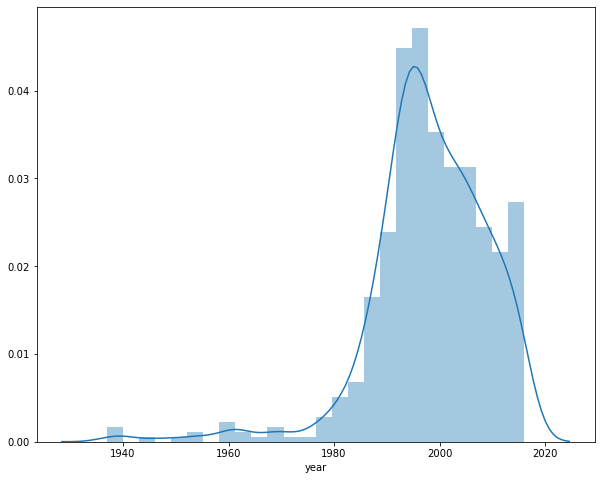

In [16]:
fig,ax=plt.subplots(figsize=(10,8))
sb.distplot(df['year'])

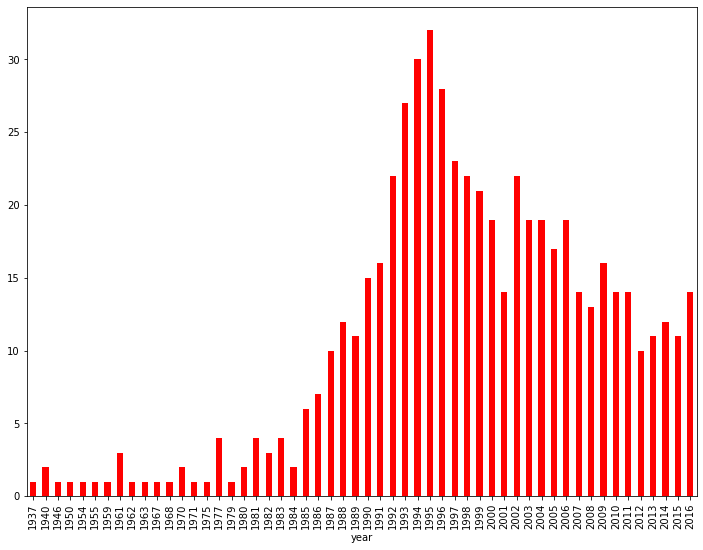

In [17]:
df.groupby('year')['year'].count().plot(kind='bar', figsize=(12,9), color='red')

## Task 3: Does Movies Income Decreased or Increased?

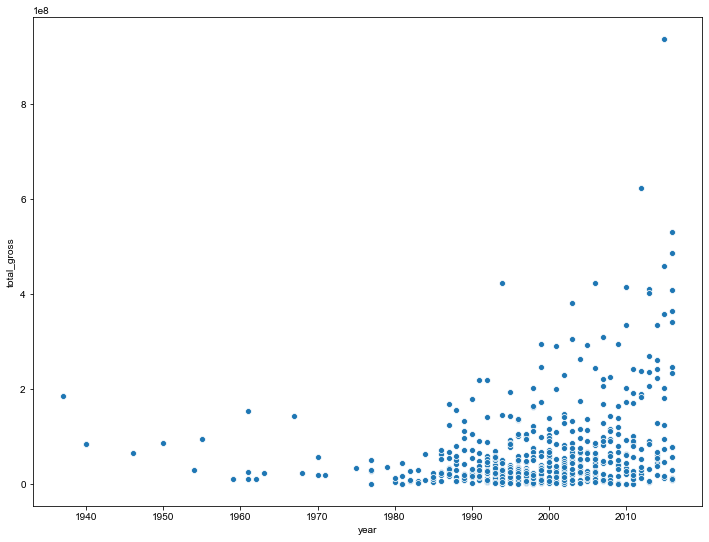

In [18]:
fig,ax=plt.subplots(figsize=(12,9))
sb.set(style="darkgrid")
sb.scatterplot(df['year'],df['total_gross'])

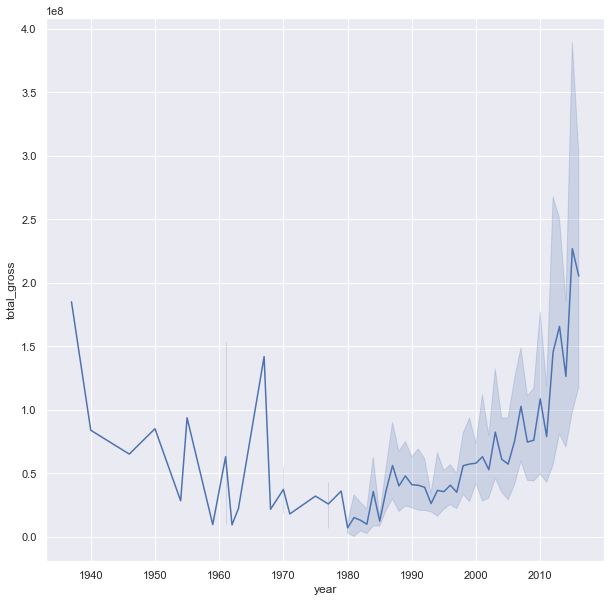

In [19]:
fig,ax=plt.subplots(figsize=(10,10))
sb.lineplot(x='year', y='total_gross', data=df)
plt.show()

C:\Users\khand\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khand\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

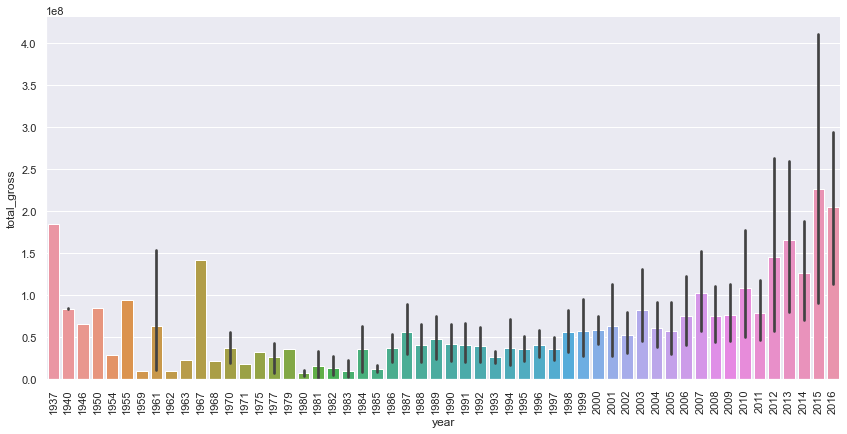

In [20]:
fg = sb.factorplot(x='year', y='total_gross', size=6, aspect=2, kind='bar', data=df)
plt.xticks(rotation='vertical')

## Task 4: Describe the total counts of Genres

In [22]:
df.dtypes

movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
year                         int32
dtype: object

In [23]:
df['genre'].unique()

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

Text(0.5, 1.0, 'GENRE')

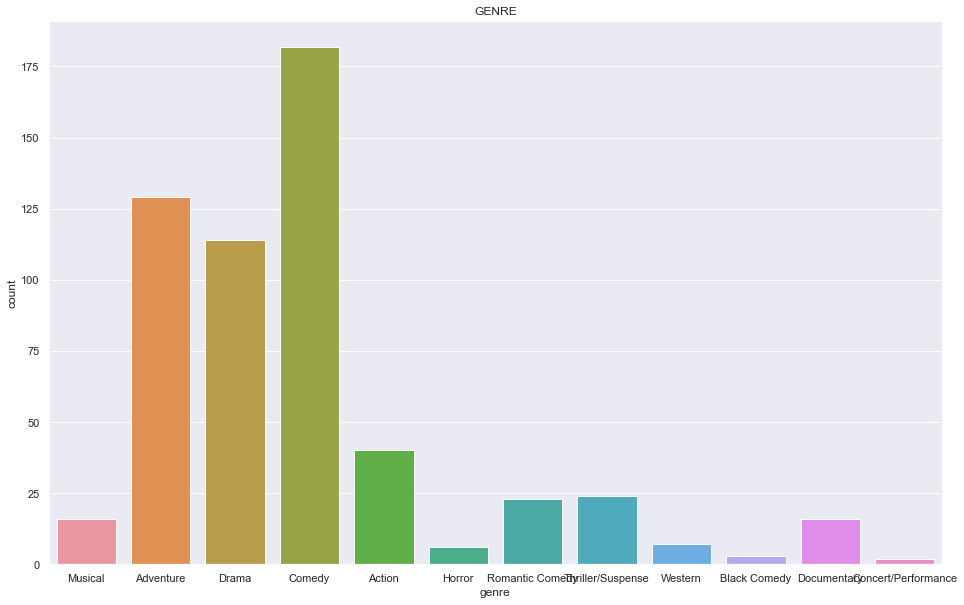

In [24]:
fig,ax=plt.subplots(figsize=(16,10))
sb.countplot(x="genre", data=df).set_title("GENRE")
